# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from pprint import pprint
from scipy import stats
from scipy.stats import linregress

from citipy import citipy
from datetime import date
import scipy.stats as st


# Import API key
from api_keys import weather_api_key
from citipy import citipy



In [2]:
#create a list of lattitute and longitiutde and cities
lat_range = (-90,90)
lon_range = (-180,180)

cities = []
lat_lon = []
unique_cities = []

#import cities datafile 
cities_pd = pd.read_csv("../output_data/cities.csv")
cities_pd.head()


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05



## Generate Cities List

In [3]:
#lat and long combination 
lat = np.random.uniform(lat_range[0], lat_range[1],size = 2000)
lon = np.random.uniform(lon_range[0], lon_range[1],size = 2000)

#map the lat and lon
lat_lon = zip(lat,lon)

#find the nearest city for a given coordinate

for coordinates in lat_lon:
    location_data = citipy.nearest_city(coordinates[0], coordinates[1])
    city = location_data.city_name
    country_name = location_data.country_code
    
    #if the location is unique add the new city into the cities list 
    if city not in unique_cities:
        unique_cities.append(city)
        cities.append(city)

print(len(cities))

767


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).



In [4]:
#URL
units = "metric"
url = "http://api.openweathermap.org/data/2.5/weather?"
API_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url = url + "appid=" + weather_api_key + "&q="

In [5]:
#create lists to store the variable data 
lat = []
lng = []
temp = []
hum = []
cld = []
wind = []
dt =[]
city_list = []
country = []
no_data = []

In [6]:
requests.get(query_url+'chuy').json()["coord"]["lat"]
    

-33.6971

In [7]:
#use API to scan through the dataset and insert it into the df and print a summary
number = 0
group = 1

#limit the API search so it doesn't max out


#start API run
print ("Initiate API Data Retrieval")
print ("-------------------------------")

for place in cities:
    try:
        print (f"Processing the file {number} of Group {group} | {place}.")
            
        #place the response into variables first
        response = requests.get(query_url+place).json()
        
        city_list.append(place)
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        hum.append(response["main"]["humidity"])
        cld.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        dt.append(response["dt"])
        country.append(response["sys"]["country"])

        
    except:
        (f"Weather for the city is unavaliable, checking next city: {place}.")
        
        city_list.remove(place)    
            
    number = number + 1
    if number == 50:
        number= 0
        group = group + 1   
        
print ("-------------------------------")
print ("API Retrieval is complete")
           

        
        

Initiate API Data Retrieval
-------------------------------
Processing the file 0 of Group 1 | mana.
Processing the file 1 of Group 1 | vaitupu.
Processing the file 2 of Group 1 | marcona.
Processing the file 3 of Group 1 | kibaek.
Processing the file 4 of Group 1 | cockburn town.
Processing the file 5 of Group 1 | albany.
Processing the file 6 of Group 1 | louisbourg.
Processing the file 7 of Group 1 | busselton.
Processing the file 8 of Group 1 | flinders.
Processing the file 9 of Group 1 | aklavik.
Processing the file 10 of Group 1 | beyneu.
Processing the file 11 of Group 1 | geraldton.
Processing the file 12 of Group 1 | rikitea.
Processing the file 13 of Group 1 | saint-philippe.
Processing the file 14 of Group 1 | acapulco.
Processing the file 15 of Group 1 | coolum beach.
Processing the file 16 of Group 1 | temir.
Processing the file 17 of Group 1 | norman wells.
Processing the file 18 of Group 1 | lolua.
Processing the file 19 of Group 1 | taolanaro.
Processing the file 20 of 

Processing the file 27 of Group 4 | kuminskiy.
Processing the file 28 of Group 4 | faanui.
Processing the file 29 of Group 4 | washington.
Processing the file 30 of Group 4 | hithadhoo.
Processing the file 31 of Group 4 | coahuayana.
Processing the file 32 of Group 4 | tamale.
Processing the file 33 of Group 4 | oriximina.
Processing the file 34 of Group 4 | moissac.
Processing the file 35 of Group 4 | touba.
Processing the file 36 of Group 4 | wenling.
Processing the file 37 of Group 4 | torbay.
Processing the file 38 of Group 4 | felidhoo.
Processing the file 39 of Group 4 | jutai.
Processing the file 40 of Group 4 | isny.
Processing the file 41 of Group 4 | nizhneyansk.
Processing the file 42 of Group 4 | nikolskoye.
Processing the file 43 of Group 4 | codrington.
Processing the file 44 of Group 4 | palabuhanratu.
Processing the file 45 of Group 4 | marawi.
Processing the file 46 of Group 4 | makokou.
Processing the file 47 of Group 4 | carnarvon.
Processing the file 48 of Group 4 |

Processing the file 6 of Group 8 | cayenne.
Processing the file 7 of Group 8 | jawar.
Processing the file 8 of Group 8 | muros.
Processing the file 9 of Group 8 | sabzevar.
Processing the file 10 of Group 8 | valdivia.
Processing the file 11 of Group 8 | burica.
Processing the file 12 of Group 8 | alta floresta.
Processing the file 13 of Group 8 | gweta.
Processing the file 14 of Group 8 | romitan.
Processing the file 15 of Group 8 | baykit.
Processing the file 16 of Group 8 | bubaque.
Processing the file 17 of Group 8 | panama city.
Processing the file 18 of Group 8 | camacha.
Processing the file 19 of Group 8 | havre.
Processing the file 20 of Group 8 | zhongshu.
Processing the file 21 of Group 8 | karratha.
Processing the file 22 of Group 8 | bloomington.
Processing the file 23 of Group 8 | komsomolskiy.
Processing the file 24 of Group 8 | awjilah.
Processing the file 25 of Group 8 | pahrump.
Processing the file 26 of Group 8 | tongliao.
Processing the file 27 of Group 8 | tsihombe.

Processing the file 32 of Group 11 | jever.
Processing the file 33 of Group 11 | sataua.
Processing the file 34 of Group 11 | atambua.
Processing the file 35 of Group 11 | avanigadda.
Processing the file 36 of Group 11 | pilot butte.
Processing the file 37 of Group 11 | mosquera.
Processing the file 38 of Group 11 | bonthe.
Processing the file 39 of Group 11 | megion.
Processing the file 40 of Group 11 | roma.
Processing the file 41 of Group 11 | halalo.
Processing the file 42 of Group 11 | deputatskiy.
Processing the file 43 of Group 11 | saint-pierre.
Processing the file 44 of Group 11 | amapa.
Processing the file 45 of Group 11 | elliot lake.
Processing the file 46 of Group 11 | nichinan.
Processing the file 47 of Group 11 | jalu.
Processing the file 48 of Group 11 | dingle.
Processing the file 49 of Group 11 | mbuji-mayi.
Processing the file 0 of Group 12 | hami.
Processing the file 1 of Group 12 | riyadh.
Processing the file 2 of Group 12 | lagunas.
Processing the file 3 of Group 

Processing the file 6 of Group 15 | urbana.
Processing the file 7 of Group 15 | renqiu.
Processing the file 8 of Group 15 | morant bay.
Processing the file 9 of Group 15 | aflu.
Processing the file 10 of Group 15 | nhulunbuy.
Processing the file 11 of Group 15 | abonnema.
Processing the file 12 of Group 15 | atasu.
Processing the file 13 of Group 15 | itacoatiara.
Processing the file 14 of Group 15 | meulaboh.
Processing the file 15 of Group 15 | salamiyah.
Processing the file 16 of Group 15 | atherton.
Processing the file 17 of Group 15 | dalvik.
Processing the file 18 of Group 15 | banda aceh.
Processing the file 19 of Group 15 | yar.
Processing the file 20 of Group 15 | rockledge.
Processing the file 21 of Group 15 | buala.
Processing the file 22 of Group 15 | mao.
Processing the file 23 of Group 15 | altay.
Processing the file 24 of Group 15 | ilheus.
Processing the file 25 of Group 15 | erenhot.
Processing the file 26 of Group 15 | kleck.
Processing the file 27 of Group 15 | dingz

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
print (len(city_list))

699


In [9]:
weather_by_city_dict = {"City": city_list, "Country": country, "Latitude": lat, "Longtitude": lng, "Max Temp": temp, "Humidity": hum, "Cloudiness": cld, "Wind Speed": wind, "Date":dt}

weather_by_city_df = pd.DataFrame.from_dict(weather_by_city_dict, orient="index")
weather_by_city_df = weather_by_city_df.transpose()

weather_by_city_df

,City,Country,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,mana,GF,5.6592,-53.7767,303.79,62,4,3.36,1631717475
1,kibaek,DK,56.0317,8.857,289.58,84,100,7.4,1631717478
2,cockburn town,TC,21.4612,-71.1419,303.13,74,40,4.12,1631717479
3,albany,US,42.6001,-73.9662,300.54,82,55,4.16,1631717480
4,busselton,AU,-33.65,115.3333,284.31,83,100,9.22,1631717481
...,...,...,...,...,...,...,...,...,...
694,maxixe,MZ,-23.8597,35.3472,298.91,67,0,7.54,1631718247
695,wasilla,US,61.5814,-149.4394,280.83,93,90,0,1631718249
696,monywa,MM,22.1167,95.1333,301.31,80,99,1.93,1631718090
697,tatarskaya kargala,RU,51.9495,55.1731,291.16,61,65,3.48,1631718251


In [10]:
weather_by_city_df = weather_by_city_df.dropna()
weather_by_city_df

,City,Country,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,mana,GF,5.6592,-53.7767,303.79,62,4,3.36,1631717475
1,kibaek,DK,56.0317,8.857,289.58,84,100,7.4,1631717478
2,cockburn town,TC,21.4612,-71.1419,303.13,74,40,4.12,1631717479
3,albany,US,42.6001,-73.9662,300.54,82,55,4.16,1631717480
4,busselton,AU,-33.65,115.3333,284.31,83,100,9.22,1631717481
...,...,...,...,...,...,...,...,...,...
694,maxixe,MZ,-23.8597,35.3472,298.91,67,0,7.54,1631718247
695,wasilla,US,61.5814,-149.4394,280.83,93,90,0,1631718249
696,monywa,MM,22.1167,95.1333,301.31,80,99,1.93,1631718090
697,tatarskaya kargala,RU,51.9495,55.1731,291.16,61,65,3.48,1631718251


In [11]:
weather_by_city_df.to_csv("../output_data/weather_data.csv")

In [12]:
#statistics
weather_by_city_df["Wind Speed"] = weather_by_city_df["Wind Speed"].astype(float)
weather_by_city_df["Humidity"] = weather_by_city_df["Humidity"].astype(float)
weather_by_city_df["Cloudiness"] = weather_by_city_df["Cloudiness"].astype(float)


weather_by_city_df.describe()

,Humidity,Cloudiness,Wind Speed
count,699.000000,699.000000,699.000000
mean,69.433476,54.161660,3.394464
std,22.684887,39.265037,2.437878
min,1.000000,0.000000,0.000000
25%,60.000000,13.000000,1.640000
50%,76.000000,61.000000,2.940000
75%,86.000000,95.000000,4.480000
max,100.000000,100.000000,16.460000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#No cities in the dataframe have humidty over 100% - skipping this step. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The maximum temperatures can be found in cities nearer to the equator.


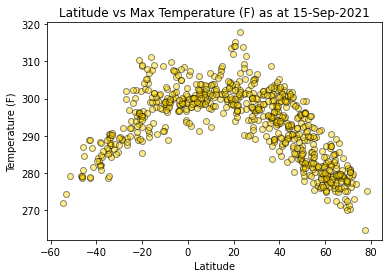

In [14]:
#scatter plot
plt.scatter(pd.to_numeric(weather_by_city_df["Latitude"]).astype(float), pd.to_numeric(weather_by_city_df["Max Temp"]).astype(float),  alpha=.45, marker ="o", facecolor="gold", edgecolors="black", )

#format the scatter plot
plt.title(f"Latitude vs Max Temperature (F) as at 15-Sep-2021")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)") 
print(f"The maximum temperatures can be found in cities nearer to the equator.")

#save the scatter plot
plt.savefig("../Images/Latitude vs Temperature Plot.png")

plt.show()

## Latitude vs. Humidity Plot

Cities found nearer to the equator experience higher humidity.


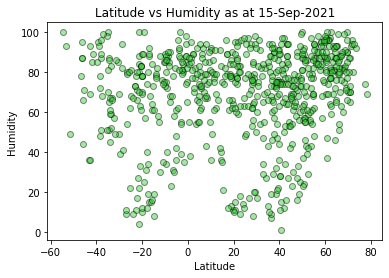

In [15]:
#scatter plot
plt.scatter(pd.to_numeric(weather_by_city_df["Latitude"]).astype(float), pd.to_numeric(weather_by_city_df["Humidity"]).astype(float),  alpha=.45, marker ="o", facecolor="limegreen", edgecolors="black", )

#format the scatter plot
plt.title(f"Latitude vs Humidity as at 15-Sep-2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity") 
print(f"Cities found nearer to the equator experience higher humidity.")

#save the scatter plot
plt.savefig("../Images/Latitude vs Humidity Plot.png")

plt.show()

## Latitude vs. Cloudiness Plot

Cities found further away from the equator experienced higher cloudiness.


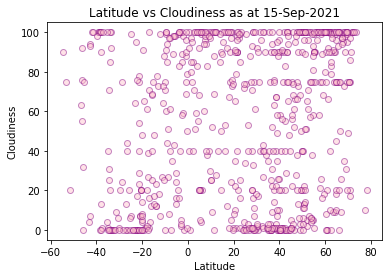

In [16]:
#scatter plot
plt.scatter(pd.to_numeric(weather_by_city_df["Latitude"]).astype(float), pd.to_numeric(weather_by_city_df["Cloudiness"]).astype(float),  alpha=.45, marker ="o", facecolor="pink", edgecolors="purple", )

#format the scatter plot
plt.title(f"Latitude vs Cloudiness as at 15-Sep-2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness") 
print(f"Cities found further away from the equator experienced higher cloudiness.")

#save the scatter plot
plt.savefig("../Images/Latitude vs Cloudiness Plot.png")

plt.show()

## Latitude vs. Wind Speed Plot

Cities found further north from the equator experienced higher Wind Speeds.


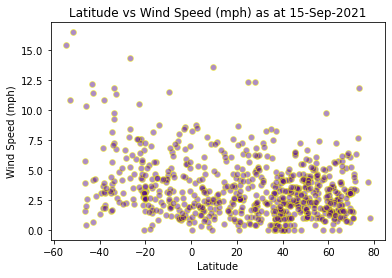

In [17]:
#scatter plot
plt.scatter(pd.to_numeric(weather_by_city_df["Latitude"]).astype(float), pd.to_numeric(weather_by_city_df["Wind Speed"]).astype(float),  alpha=.45, marker ="o", facecolor="indigo", edgecolors="yellow", )

#format the scatter plot
plt.title(f"Latitude vs Wind Speed (mph) as at 15-Sep-2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)") 
print(f"Cities found further north from the equator experienced higher Wind Speeds.")

#save the scatter plot
plt.savefig("../Images/Latitude vs Wind Speed Plot.png")

plt.show()

## Linear Regression

In [18]:
#creating dataframes to store Northern hemisphere cities and southern hemisphere cities

north_hem = weather_by_city_df.loc[pd.to_numeric(weather_by_city_df["Latitude"]).astype(float) > 0, :]
south_hem = weather_by_city_df.loc[pd.to_numeric(weather_by_city_df["Latitude"]).astype(float) < 0, :]

In [19]:
#defining the equation for regression analysis
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Northern Hemisphere - Max Temp vs. Latitude Linear Regression y = -0.41x + 308.25
R-squared: -0.8085478251257376, the regression details a strong correlation
The regression and the R-value details a strong-negative correlation suggesting further north cities lie from the equater the colder it gets


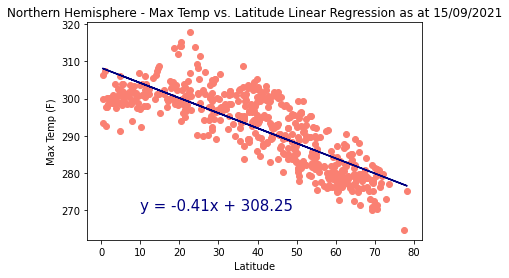

In [20]:
x_axis = pd.to_numeric(north_hem['Latitude']).astype(float)
y_axis = pd.to_numeric(north_hem['Max Temp']).astype(float)


#the equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#summary
print(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression {regression}")
print(f"R-squared: {rvalue}, the regression details a strong correlation")
print("The regression and the R-value details a strong-negative correlation suggesting further north cities lie from the equater the colder it gets")

#regression plot
plt.scatter(x_axis,y_axis, color = "salmon")
plt.plot(x_axis,regress_values,"r-", color="navy")

#regression format
plt.annotate(regression,(10,270),fontsize=15,color="navy")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression as at 15/09/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Southern Hemisphere - Max Temp vs. Latitude Linear Regression y = 0.48x + 304.34
R-squared: 0.7833541011007064, the regression details a strong correlation
The regression and the R-value details a strong-postive correlation suggesting further south cities lie from the equater the colder it gets


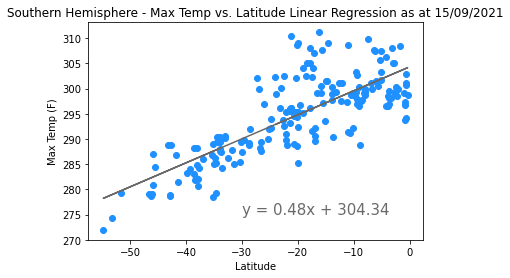

In [21]:
x_axis = pd.to_numeric(south_hem['Latitude']).astype(float)
y_axis = pd.to_numeric(south_hem['Max Temp']).astype(float)


#the equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#summary
print(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression {regression}")
print(f"R-squared: {rvalue}, the regression details a strong correlation")
print("The regression and the R-value details a strong-postive correlation suggesting further south cities lie from the equater the colder it gets")

#regression plot
plt.scatter(x_axis,y_axis, color = "dodgerblue")
plt.plot(x_axis,regress_values,"r-", color="dimgrey")

#regression format
plt.annotate(regression,(-30,275),fontsize=15,color="dimgrey")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression as at 15/09/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression y = 0.16x + 64.25
R-squared: 0.14360725696358034, the regression details a strong correlation
The regression and the R-value details a weak correlation suggesting distance away from the equator doesn't have impact on humidity


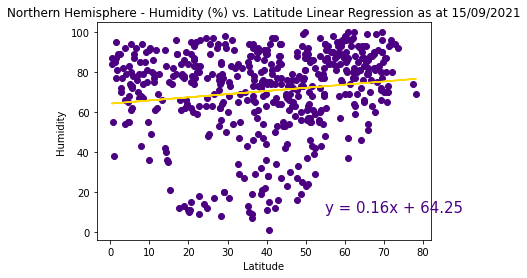

In [22]:
x_axis = pd.to_numeric(north_hem['Latitude']).astype(float)
y_axis = pd.to_numeric(north_hem['Humidity']).astype(float)


#the equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#summary
print(f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression {regression}")
print(f"R-squared: {rvalue}, the regression details a strong correlation")
print("The regression and the R-value details a weak correlation suggesting distance away from the equator doesn't have impact on humidity")

#regression plot
plt.scatter(x_axis,y_axis, color = "indigo")
plt.plot(x_axis,regress_values,"r-", color="gold")

#regression format
plt.annotate(regression,(55,10),fontsize=15,color="indigo")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression as at 15/09/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression y = -0.04x + 65.58
R-squared: -0.022483765970988306, the regression details a strong correlation
The regression and the R-value shows no correlation between distance away from the equator and humidity in the Southern Hemisphere


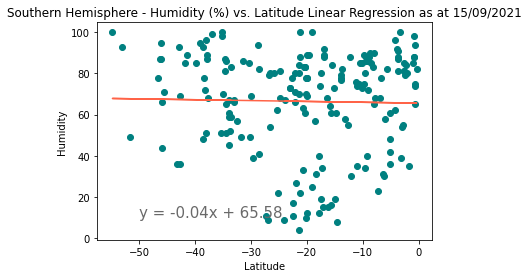

In [23]:
x_axis = pd.to_numeric(south_hem['Latitude']).astype(float)
y_axis = pd.to_numeric(south_hem['Humidity']).astype(float)


#the equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#summary
print(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression {regression}")
print(f"R-squared: {rvalue}, the regression details a strong correlation")
print("The regression and the R-value shows no correlation between distance away from the equator and humidity in the Southern Hemisphere")

#regression plot
plt.scatter(x_axis,y_axis, color = "teal")
plt.plot(x_axis,regress_values,"r-", color="tomato")

#regression format
plt.annotate(regression,(-50,10),fontsize=15,color="dimgrey")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression as at 15/09/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regressiony = 0.13x + 52.91
R-squared: 0.06538583381304947, the regression details a strong correlation
The regression and the R-value no correlation between distance north from the equator and cloudiness


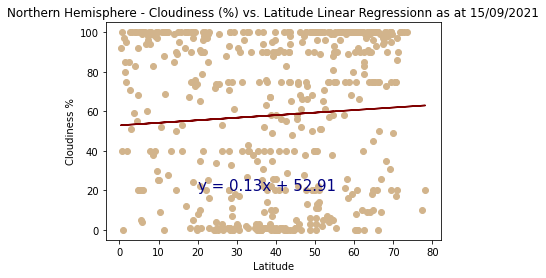

In [24]:
x_axis = pd.to_numeric(north_hem['Latitude']).astype(float)
y_axis = pd.to_numeric(north_hem['Cloudiness']).astype(float)


#the equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#summary
print(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression{regression}")
print(f"R-squared: {rvalue}, the regression details a strong correlation")
print("The regression and the R-value no correlation between distance north from the equator and cloudiness")

#regression plot
plt.scatter(x_axis,y_axis, color = "tan")
plt.plot(x_axis,regress_values,"r-", color="maroon")

#regression format
plt.annotate(regression,(20,20),fontsize=15,color="navy")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regressionn as at 15/09/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression y = 0.27x + 49.42
R-squared: 0.09320953608580798, the regression details a strong correlation
The regression and the R-value shows no correlation between distance away from the equator and cloudiness in the Southern Hemisphere


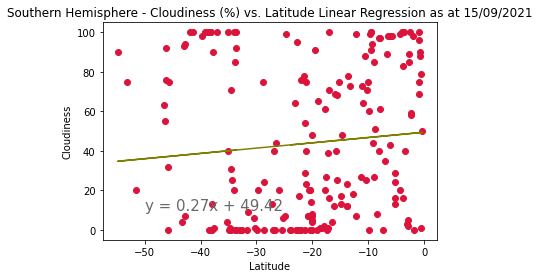

In [25]:
x_axis = pd.to_numeric(south_hem['Latitude']).astype(float)
y_axis = pd.to_numeric(south_hem['Cloudiness']).astype(float)


#the equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#summary
print(f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {regression}")
print(f"R-squared: {rvalue}, the regression details a strong correlation")
print("The regression and the R-value shows no correlation between distance away from the equator and cloudiness in the Southern Hemisphere")

#regression plot
plt.scatter(x_axis,y_axis, color = "crimson")
plt.plot(x_axis,regress_values,"r-", color="olive")

#regression format
plt.annotate(regression,(-50,10),fontsize=15,color="dimgrey")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression as at 15/09/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regressiony = -0.0x + 3.21
R-squared: -0.044867318666400056, the regression details a strong correlation
The regression and the R-value very little correlation between distance north from the equator and wind speed (mph)


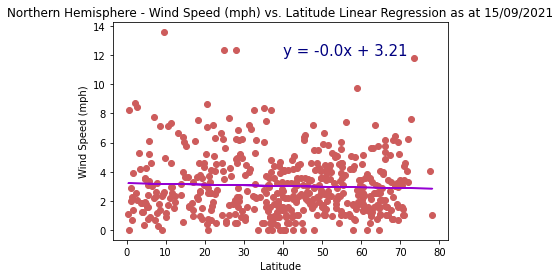

In [26]:
x_axis = pd.to_numeric(north_hem['Latitude']).astype(float)
y_axis = pd.to_numeric(north_hem['Wind Speed']).astype(float)


#the equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#summary
print(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression{regression}")
print(f"R-squared: {rvalue}, the regression details a strong correlation")
print("The regression and the R-value very little correlation between distance north from the equator and wind speed (mph)")

#regression plot
plt.scatter(x_axis,y_axis, color = "indianred")
plt.plot(x_axis,regress_values,"r-", color="darkviolet")

#regression format
plt.annotate(regression,(40,12),fontsize=15,color="navy")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression as at 15/09/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("../Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression y = -0.06x + 3.14
R-squared: -0.2740968334360721, the regression details a strong correlation
The regression and the R-value shows weak correlation between distance away from the equator and Wind Speed in the Southern Hemisphere


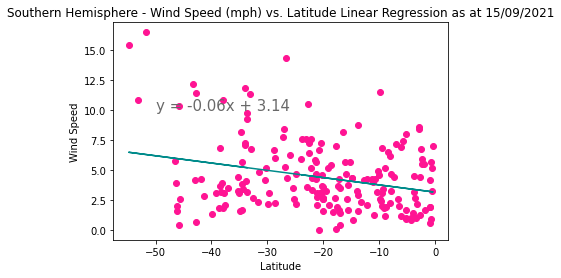

In [27]:
x_axis = pd.to_numeric(south_hem['Latitude']).astype(float)
y_axis = pd.to_numeric(south_hem['Wind Speed']).astype(float)


#the equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#summary
print(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression {regression}")
print(f"R-squared: {rvalue}, the regression details a strong correlation")
print("The regression and the R-value shows weak correlation between distance away from the equator and Wind Speed in the Southern Hemisphere")

#regression plot
plt.scatter(x_axis,y_axis, color = "deeppink")
plt.plot(x_axis,regress_values,"r-", color="darkcyan")

#regression format
plt.annotate(regression,(-50,10),fontsize=15,color="dimgrey")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression as at 15/09/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("../Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")